In [1]:
import comtypes.client

def PPTtoPDF(inputFileName, outputFileName, formatType = 32):
    powerpoint = comtypes.client.CreateObject("Powerpoint.Application")
    powerpoint.Visible = 1

    if outputFileName[-3:] != 'pdf':
        outputFileName = outputFileName + ".pdf"
    deck = powerpoint.Presentations.Open(inputFileName)
    deck.SaveAs(outputFileName, formatType) # formatType = 32 for ppt to pdf
    deck.Close()
    powerpoint.Quit()

In [2]:
from glob import glob

for i in glob("C:\\Users\\foresight_User\\Desktop\\知識通\\統計學\\*.ppt"):
    PPTtoPDF(i,i)
for i in glob("C:\\Users\\foresight_User\\Desktop\\知識通\\統計學\\*.pptx"):
    PPTtoPDF(i,i)

In [8]:
"C:/Users/foresight_User/Desktop/知識通/統計學/100S216_AA01L01.pptx"

'C:/Users/foresight_User/Desktop/知識通/統計學/100S216_AA01L01.pptx'

In [3]:
from pdf2docx import Converter
import fitz  # PyMuPDF
import re

def remove_watermarks_and_hidden_text(pdf_path, temp_pdf_path):
    # 打開PDF文件
    pdf_document = fitz.open(pdf_path)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        
        # 刪除水印和隱藏文字
        text_instances = page.search_for("Watermark Text")  # 假設水印文本
        for inst in text_instances:
            page.erase_text(inst)
        
        # 這裡添加更多刪除隱藏字元的邏輯
        # 可以使用正則表達式或特定的字元檢測
        text = page.get_text("text")
        cleaned_text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
        page.insert_text((0, 0), cleaned_text, fontsize=12)  # 示例位置和大小

    pdf_document.save(temp_pdf_path)
    pdf_document.close()

def convert_pdf_to_docx(pdf_path, docx_path):
    cv = Converter(pdf_path)
    cv.convert(docx_path, start=0, end=None)
    cv.close()




In [10]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

import os
import sys

In [48]:
data_dir = "C:/Users/foresight_User/Desktop/AIUPS/" #'/mnt/c/Users/foresight/kai_work/AIUPS/'
# if not os.path.isfile(data_dir+'RESULTS.txt'):
#     print("create ",data_dir+'RESULTS.txt')
#     out2 = open(data_dir+'RESULTS.txt', 'a')
#     out2.write('algorithms\tn_samples\tn_features\texperiment_time')
#     out2.close()
#     print("RESULTS.txt has been create")
################# 先測試小資料能不能動
out_l = []
in_l = []
################
for n_samples in list(np.random.randint(1000000,1000001,size=10)): #[,50000,100000,200000]
    for n_features in list(np.random.randint(10,11,size=10)): #2000,1000,500,100 [100,500,1000,2000,5000]
        #n_samples = 10000
        #n_features = 2000
        n_informative = n_features
        random_seed = np.random.randint(1000)
        noise = 0.5
        
        data_name = f"Jake_samples_{n_samples}_features_{n_features}_informative_{n_informative}_noise_{noise}"
        data_type = "csv"

        X, y = make_regression(n_samples=n_samples,n_features=n_features,n_informative=n_informative, noise=noise,random_state=random_seed)
        data = data_dir+data_name +"."+ "csv"
        pd.DataFrame(np.concatenate((y.reshape(-1,1),X),axis=1)).rename(columns={0:"Main_Y"}).to_csv(data,sep=",",index=False)
        data = pd.read_csv(data_dir+data_name+"."+data_type)#.drop(columns=["Unnamed: 0"])
        
        file_size_mb = os.path.getsize(data_dir+data_name+"."+data_type)/ (1024*1024)
        # Conversion to kilobytes, megabytes, and gigabytes
        file_in_size_mb = sys.getsizeof(data)/ (1024*1024) # MB
        out_l.append(file_size_mb)
        in_l.append(file_in_size_mb)

In [20]:
sys.getsizeof(data)/ (1024*1024)

76.67557144165039

In [51]:
np.array(out_l)

array([206.2360878 , 206.23365974, 206.17999268, 206.22524071,
       206.23234558, 206.23282909, 206.23479748, 206.23579788,
       206.23081207, 206.22421932, 206.23803425, 206.23503113,
       206.23568344, 206.23922062, 206.23145103, 206.22313976,
       206.23075676, 206.23291397, 206.2337656 , 206.23147297,
       206.2386713 , 206.23749352, 206.24221516, 206.23231125,
       206.23235226, 206.22588825, 206.23908234, 206.2367382 ,
       206.22962856, 206.2360878 , 206.24194241, 206.23638916,
       206.23679352, 206.23209763, 206.18953323, 206.2323103 ,
       206.23429489, 206.22587299, 206.23803425, 206.2380743 ,
       206.23370171, 206.22737789, 206.22524071, 206.23390198,
       206.24214458, 206.23737812, 206.234972  , 206.23505306,
       206.23815727, 206.23195076, 206.22769642, 206.23636627,
       206.23310852, 206.23298359, 206.23204613, 206.2284708 ,
       206.23826122, 206.22821712, 206.22568321, 206.23279762,
       206.2348423 , 206.23615551, 206.227458  , 206.23

In [52]:

r_1= pd.DataFrame(np.array(out_l).reshape(-1,1)).assign(name="original data size")
r_2 = pd.DataFrame(np.array(in_l).reshape(-1,1)).assign(name="data import to Pandas")


In [53]:
r_3 = pd.concat([r_1,r_2],axis=0).rename(columns={0:"MB"})

<Axes: xlabel='name', ylabel='MB'>

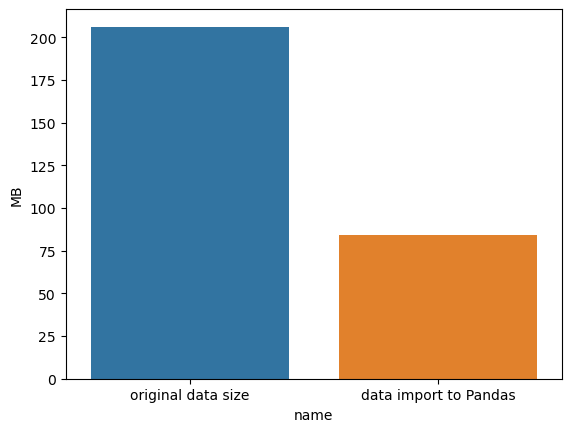

In [54]:
import seaborn as sns

sns.barplot(r_3,y="MB",x="name")

In [8]:
a = np.array([10,100,1000]).reshape(-1,1)

In [19]:
import os
# 定義文件路徑
# for original_pdf in glob("C:\\Users\\foresight_User\\Desktop\\知識通\\統計學\\*.pdf"):
#     cleaned_pdf = original_pdf +".cleaned.pdf"
    

#     # 去除浮水印和隱藏字元
#     remove_watermarks_and_hidden_text(original_pdf, cleaned_pdf)

    # 將PDF轉換為Word文檔
    #convert_pdf_to_docx(cleaned_pdf, output_docx)
for i,original_pdf in enumerate(glob("C:\\Users\\foresight_User\\Desktop\\知識通\\食譜\\*.pdf.cleaned.pdf")):
    
    #cleaned_pdf = original_pdf +".cleaned.pdf"
    #os.rename(original_pdf, "C:\\Users\\foresight_User\\Desktop\\知識通\\食譜\\"+str(i)+'_cleaned.pdf')
    #try:
    remove_watermarks_and_hidden_text(original_pdf, f"C:\\Users\\foresight_User\\Desktop\\知識通\\食譜\\cook_{i}_clean.pdf")
    os.remove(original_pdf)
    #except:
    #print(cleaned_pdf)
print("Conversion completed successfully!")


Conversion completed successfully!
